# Monkey-patching


In [ ]:
#| default_exp patch

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
#| hide
#| export

import torch
from fastcore.foundation import patch_to
import matplotlib.pyplot as plt

from lovely_tensors.repr_str import StrProxy
from lovely_tensors.repr_rgb import RGBProxy
from lovely_tensors.repr_plt import PlotProxy
from lovely_tensors.repr_chans import ChanProxy

In [ ]:
# |export
def monkey_patch(cls=torch.Tensor):
    "Monkey-patch lovely features into `cls`" 

    @patch_to(cls)
    def __repr__(self: torch.Tensor, *, tensor_contents=None):        
        return str(StrProxy(self))

    # Plain - the old behavior
    @patch_to(cls, as_prop=True)
    def p(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, plain=True)

    # Verbose - print both stats and plain values
    @patch_to(cls, as_prop=True)
    def v(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, verbose=True)

    @patch_to(cls, as_prop=True)
    def deeper(self: torch.Tensor):
        return StrProxy(self, depth=1)

    @patch_to(cls, as_prop=True)
    def rgb(t: torch.Tensor):
        return RGBProxy(t)
    
    @patch_to(cls, as_prop=True)
    def chans(t: torch.Tensor):
        return ChanProxy(t)

    @patch_to(cls, as_prop=True)
    def plt(t: torch.Tensor):
        return PlotProxy(t)

In [ ]:
monkey_patch()

In [ ]:
image = torch.load("mysteryman.pt")

In [ ]:
spicy = image.flatten()[:12].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!

In [ ]:
spicy.v

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!
[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
spicy.p

[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
image.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
dt = torch.randn(3, 3, 5)
dt.deeper(3)

tensor[3, 3, 5] n=45 x∈[-2.536, 2.664] μ=0.145 σ=1.138
  tensor[3, 5] n=15 x∈[-1.773, 2.664] μ=0.413 σ=1.215
    tensor[5] x∈[-0.321, 2.664] μ=0.906 σ=1.171 [0.238, 0.510, 2.664, -0.321, 1.440]
    tensor[5] x∈[-1.773, 0.669] μ=-0.544 σ=0.923 [-1.773, 0.669, -0.271, -1.070, -0.274]
    tensor[5] x∈[-0.682, 2.025] μ=0.876 σ=1.107 [-0.682, 0.366, 1.822, 2.025, 0.851]
  tensor[3, 5] n=15 x∈[-2.536, 1.959] μ=0.073 σ=1.229
    tensor[5] x∈[-0.542, 1.959] μ=0.806 σ=1.220 [-0.491, -0.542, 1.478, 1.959, 1.626]
    tensor[5] x∈[-2.536, 0.720] μ=-0.361 σ=1.276 [-0.128, 0.377, 0.720, -2.536, -0.240]
    tensor[5] x∈[-1.251, 1.444] μ=-0.224 σ=1.072 [-0.613, 0.186, -0.887, 1.444, -1.251]
  tensor[3, 5] n=15 x∈[-1.698, 1.373] μ=-0.052 σ=0.979
    tensor[5] x∈[-0.857, 1.316] μ=-0.013 σ=0.971 [1.316, -0.857, -0.488, -0.747, 0.712]
    tensor[5] x∈[-1.698, 1.373] μ=0.118 σ=1.223 [0.395, -1.698, 0.965, -0.443, 1.373]
    tensor[5] x∈[-1.236, 1.236] μ=-0.260 σ=0.908 [-0.529, 1.236, -0.337, -0.435, -1.236

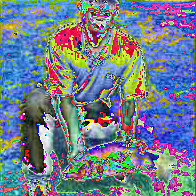

In [ ]:
image.rgb

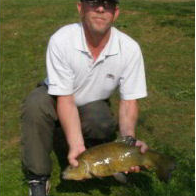

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
image.rgb(in_stats)

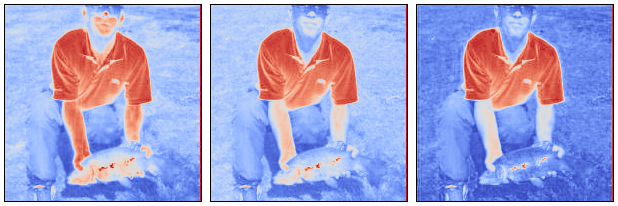

In [ ]:
mean = torch.tensor(in_stats[0])[:,None,None]
std = torch.tensor(in_stats[1])[:,None,None]

(image*std + mean).chans # all pixels in [0, 1] range

In [ ]:
(image*0.3+0.5) # Slightly outside of [0, 1] range

tensor[3, 196, 196] n=115248 x∈[-0.135, 1.292] μ=0.384 σ=0.322

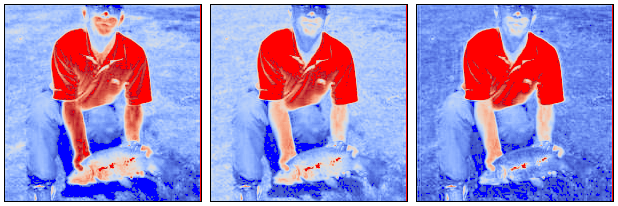

In [ ]:
(image*0.3+0.5).chans # shows clipping (bright blue/red)

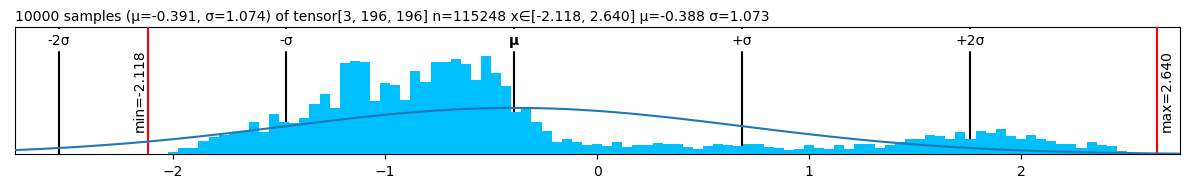

In [ ]:
image.plt

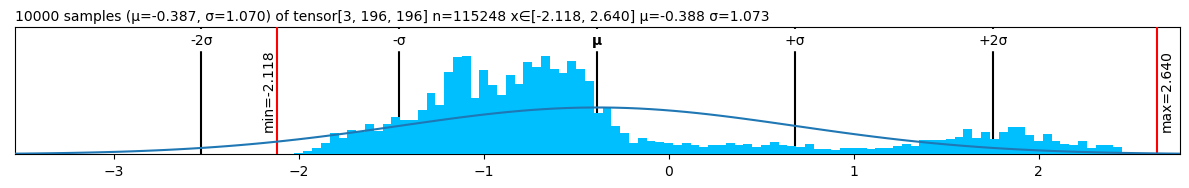

In [ ]:
image.plt(center="mean")

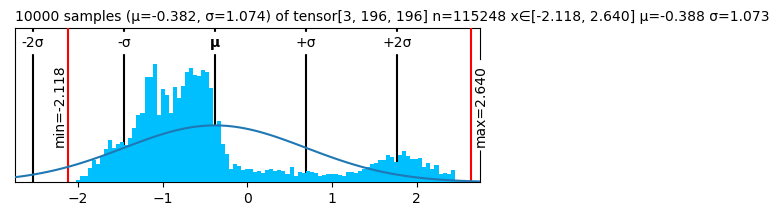

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
plt.close(fig)
image.plt(ax=ax)
fig

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()